### SBS 뉴스 크롤링

* 1) SBS 최신 뉴스 사이트로 이동한다.
        url주소 : https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=1
* 2) get 방식으로 호출하여 데이터를 크롤링한다.        
* 3) pageIdx=xx 파라미터에 값을 변화하여 처리한다.
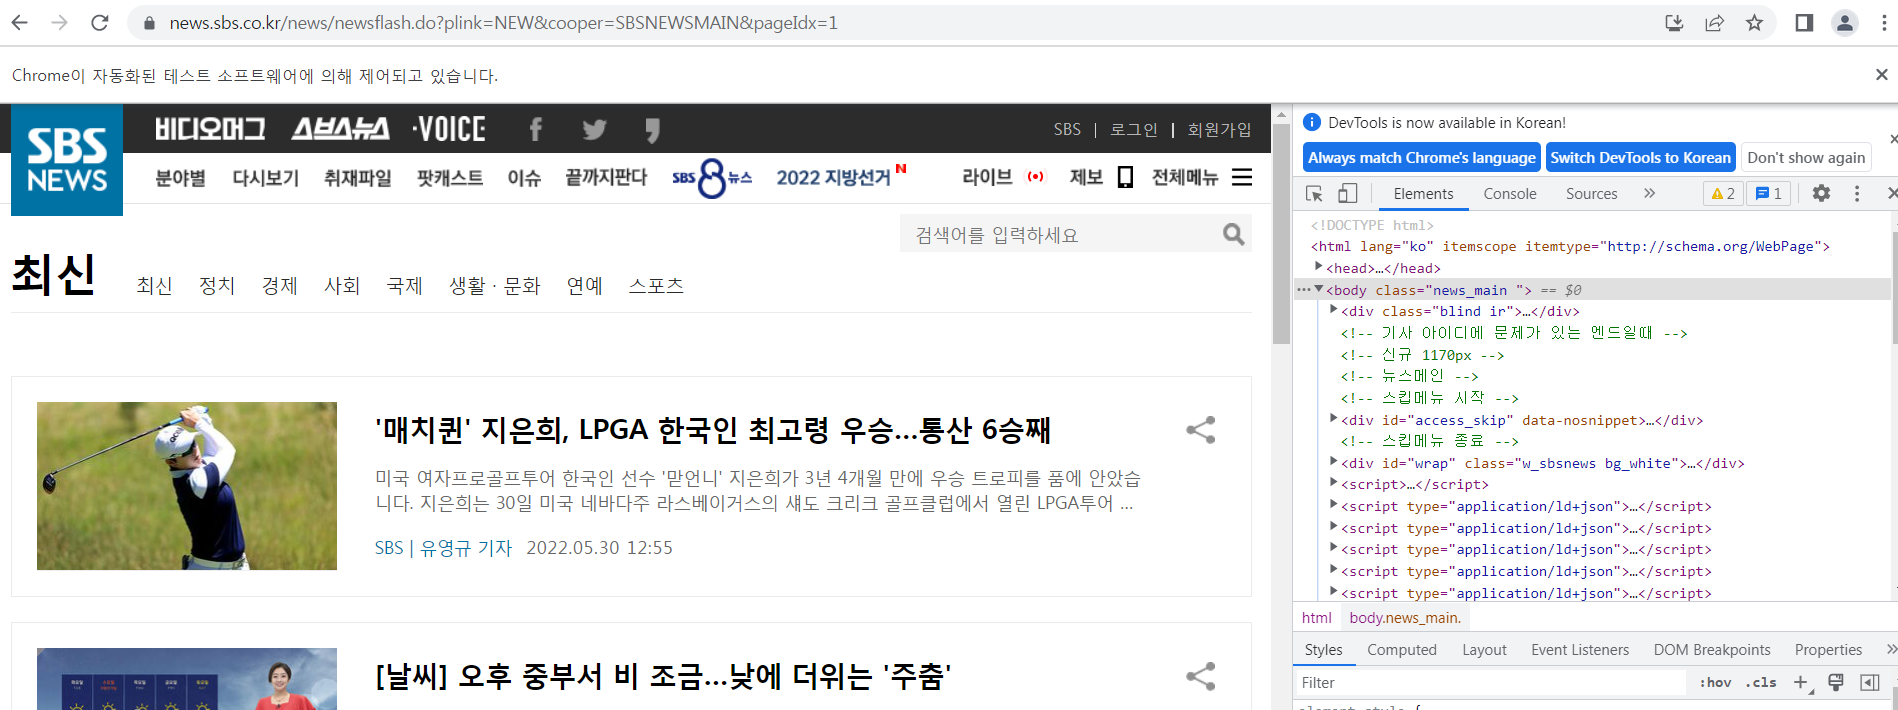

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url_main = "https://news.sbs.co.kr"
url_sub = "/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=1" # {}이 부분은 반복문에서 페이지를 호출할 때 페이지 번호 대입
url = url_main+url_sub

print(url)
req=requests.get(url)

print("status code :", req.status_code)

https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=1
status code : 200


In [4]:
html = req.text
soup = BeautifulSoup(html, 'html.parser')

soup

<!DOCTYPE html>

<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="SBS" name="attribution"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>SBS 뉴스 최신/속보</title>
<meta content="SBS 뉴스 최신/속보" name="title"/>
<meta content="width=970" name="viewport"/>
<link href="https://img.sbs.co.kr/news/logo/sbslogo.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://news.sbs.co.kr/news/newsFlash.do?pageDate=20220609" rel="canonical"/>
<link href="http://news.sbs.co.kr/news/newsFlash.do?pageDate=20220609" rel="alternate"/>
<link href="https://mnews.sbs.co.kr/news/newsFlash.do" media="only screen and (max-width: 640px)" rel="alternate"/>
<link crossorigin="" href="https://image.sbs.co.kr" rel="preconnect"/><link crossorigin="" href="https://img.sbs.co.kr" rel="preconnect"/>
<link href="https://image.sbs.co.kr/" rel="dns-prefetch"/><link href="https://img.sbs.co.kr/" rel="dns-prefetch"/><link href="https://api.da

In [6]:
tdlist = soup.select("div.w_news_list > ul > li")
print(len(tdlist),tdlist)

10 [<li itemscope="" itemtype="http://schema.org/NewsArticle">
<meta class="ir blind" itemid="https://news.sbs.co.kr//news/endPage.do?news_id=N1006780491" itemprop="mainEntityOfPage" itemscope="" itemtype="http://schema.org/WebPage"/>
<meta class="ir blind" content="김보미" itemprop="author"/>
<meta class="ir blind" content="//img.sbs.co.kr/newimg/news/20220609/201671517_1280.jpg" itemprop="image"/>
<meta class="ir blind" content="2022-06-09T14:22:00+09:00" itemprop="datePublished"/>
<meta class="ir blind" content="2022-06-09T14:22:00+09:00" itemprop="dateModified"/>
<meta class="ir blind" content="명예훼손 혐의 유시민 한동훈이 먼저 사과해야…오늘 1심 선고" itemprop="headline"/>
<!-- 기사 -->
<a class="news" href="/news/endPage.do?news_id=N1006780491" title="명예훼손 혐의 유시민 한동훈이 먼저 사과해야…오늘 1심 선고">
<!-- 섬네일 -->
<span class="thumb">
<img alt="명예훼손 혐의 유시민 한동훈이 먼저 사과해야…오늘 1심 선고" class="lazy" data-src="//img.sbs.co.kr/newimg/news/20220609/201671517_300.jpg" decoding="async" loading="lazy" onerror="this.onerror=null;this.src

In [5]:

if req.status_code == 200 : 
#    html = req.content
    tdlist = soup.select("div.w_news_list > ul > li")
    print(len(tdlist))
#    print(tdlist)
#    print(soup)
    for textname in tdlist:
#        mtitle = textname.select_one("a[href]").text.strip()
        mtitle = textname.select_one("a.news").get("title")
        mlink = textname.select_one("a.news").get("href")
        if textname.select_one("em.name")== None : #태그가 없는 경우 에러 처리
            mname = ""
        else:
            mname = textname.select_one("em.name").text.strip()
#        mname = textname.select_one("em.name").text.strip()

        mdate = textname.select_one("span.date").text.strip()
        
        print(mtitle, mname, mdate, url_main+mlink, sep="^==^")
        print("="*100)
else:
    print("SBS뉴스 사이트에서 정상적으로 호출되지 않았습니다.")
    
#for href in soup.find("div", class_="w_news_list").find_all("li"):
#    print(href.find("a")["href"])
    

10
명예훼손 혐의 유시민 한동훈이 먼저 사과해야…오늘 1심 선고^==^SBS | 김보미 기자^==^2022.06.09 14:22^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780491
[포착] 양심 가출함?…공용 수돗물 끌어다 수영장 만든 캠핑 빌런^==^SBS | 김성화 에디터^==^2022.06.09 14:19^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780131
검찰, 블랙리스트 의혹 백운규 前 산업부 장관 소환^==^SBS | 유영규 기자^==^2022.06.09 14:18^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780486
소상공인 25만 명, 사업장과 거주지 다르다고 지원 제외^==^SBS | 유영규 기자^==^2022.06.09 14:06^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780463
플래툰 부순 3안타 폭발…탬파베이 최지만, 팀 대승 견인^==^SBS | 이성훈 기자^==^2022.06.09 14:04^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780461
한 달 전 데자뷔? 루나2 코인도 9분의 1토막…CEO는 잠수^==^SBS | 유영규 기자^==^2022.06.09 14:01^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780439
사참위 3년 반 만에 활동 종료…세월호 침몰 원인 규명 못해^==^SBS | 유영규 기자^==^2022.06.09 13:59^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006780428
불량배 소탕? 대규모 인권 침해 사건…꼬꼬무, 삼청교육대 조명^==^^==^2022.06.09 13:47^==^https://news.sb

In [10]:
import requests
from bs4 import BeautifulSoup
import time
import random

In [14]:
url_main = "https://news.sbs.co.kr"
url_sub = "/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx={}" # {}이 부분은 반복문에서 페이지를 호출할 때 페이지 번호 대입
url = url_main+url_sub
for x in range(1,10):
    url=url_main+url_sub.format(x)
    print(url)
list_comment = []
pagerange = 5

https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=1
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=2
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=3
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=4
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=5
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=6
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=7
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=8
https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=9


In [15]:
for pagenm in range(1,pagerange+1):
   ## url = url.format(pagenm)
    req=requests.get(url)
    time.sleep(2)
    print("status code :", req.status_code)

    if req.status_code == 200 : 
        html = req.content
        soup = BeautifulSoup(html, 'html.parser')
        tdlist = soup.select("div.w_news_list > ul > li")
        print(len(tdlist))
        for textname in tdlist:
                
            mtitle = textname.select_one("a.news").get("title")
            mlink = textname.select_one("a").get("href")
            if textname.select_one("em.name")== None : #태그가 없는 경우 에러 처리
                mname = ""
            else:
                mname = textname.select_one("em.name").text.strip()

            mdate = textname.select_one("span.date").text.strip()

            print(mtitle,mname, mdate, url_main+mlink, sep="^==^")
            print("="*100)
#            list_comment.append(mtitle, url_main+mlink, mname, mdate)
            list_comment.append((str(pagenm)+"page", mtitle, url_main+mlink, mname, mdate))
        interval = round(random.uniform(0.2,1.2),2)
        time.sleep(interval)
    else:
        print("SBS뉴스 사이트에서 정상적으로 호출되지 않았습니다.")      

status code : 200
10
신규 확진 1만 2,161명…위중증 106명 · 사망 18명^==^SBS | 김경희 기자^==^2022.06.09 09:33^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779941
김종인 윤 대통령에 쓴소리할 사람 한동훈뿐…별의 순간 잡을 수도^==^SBS | 유영규 기자^==^2022.06.09 09:33^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779933
[친절한 경제] 2분기 손실보상금 100만 원 선지급, 오늘부터 신청 시작^==^SBS | 한지연 기자^==^2022.06.09 09:24^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779917
벤투호, 2번의 모의고사...오답 노트 쌓이네~! [축덕쑥덕]^==^SBS | 하성룡 기자^==^2022.06.09 09:15^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779535
윤 대통령, MB 사면론에 이십몇 년 수감 안 맞지 않나^==^SBS | 유영규 기자^==^2022.06.09 09:10^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779907
윤계상, 오늘(9일) 1년 늦은 결혼식…5세 연하 뷰티 CEO와 화촉^==^^==^2022.06.09 08:59^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779866
인천 아라뱃길 수로서 50대 여성 숨진 채 발견^==^SBS | 유영규 기자^==^2022.06.09 08:46^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779871
인천 고교 기숙사서 학폭 정황…시 교육청, 조사 나서^==^SBS | 유영규 기자^==^2022.06.09 

status code : 200
10
신규 확진 1만 2,161명…위중증 106명 · 사망 18명^==^SBS | 김경희 기자^==^2022.06.09 09:33^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779941
김종인 윤 대통령에 쓴소리할 사람 한동훈뿐…별의 순간 잡을 수도^==^SBS | 유영규 기자^==^2022.06.09 09:33^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779933
[친절한 경제] 2분기 손실보상금 100만 원 선지급, 오늘부터 신청 시작^==^SBS | 한지연 기자^==^2022.06.09 09:24^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779917
벤투호, 2번의 모의고사...오답 노트 쌓이네~! [축덕쑥덕]^==^SBS | 하성룡 기자^==^2022.06.09 09:15^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779535
윤 대통령, MB 사면론에 이십몇 년 수감 안 맞지 않나^==^SBS | 유영규 기자^==^2022.06.09 09:10^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779907
윤계상, 오늘(9일) 1년 늦은 결혼식…5세 연하 뷰티 CEO와 화촉^==^^==^2022.06.09 08:59^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779866
인천 아라뱃길 수로서 50대 여성 숨진 채 발견^==^SBS | 유영규 기자^==^2022.06.09 08:46^==^https://news.sbs.co.kr/news/endPage.do?news_id=N1006779871
인천 고교 기숙사서 학폭 정황…시 교육청, 조사 나서^==^SBS | 유영규 기자^==^2022.06.09 

In [13]:
print(list_comment)

[('1page', '절벽으로 차 몰아 치매 노모 숨지게 한 40대 재판서 혐의 인정', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780526', 'SBS | 유영규 기자', '2022.06.09 14:40'), ('1page', '국내 가장 오래된 정원 궁남지에 연꽃 활짝', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780528', 'SBS | 유영규 기자', '2022.06.09 14:40'), ('1page', '충치 잘 생기는 사람은 불소 1,000ppm 이상 든 치약 사용', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780520', 'SBS | 유영규 기자', '2022.06.09 14:40'), ('1page', '톰 아저씨 톰크루즈 한국온다…탑건: 매버릭으로 내한', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780496', '', '2022.06.09 14:39'), ('1page', '제이홉, 롤라팔루자 피날레 장식한다…한국 아티스트 최초', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780495', '', '2022.06.09 14:39'), ('1page', '천국노래자랑 힘차게 외치길…故 송해 비보에 추모 물결', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780494', '', '2022.06.09 14:38'), ('1page', '공포의 20분…빌딩 직원들, 소방관 건넨 방독면 쓰고 탈출', 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006780503', 'SBS | 이강 기자', '2022.06.09 14:36'), ('1page', '한덕수, 대통령 질타 받은 교육부 격려…

### 파일로 저장하기
* 한글깨짐 방지 : to_csv 사용시 encoding = "euc-kr" 사용하여 한글깨짐 방지, utf-8사용하면 한글 깨짐 발생할 수 있음

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(list_comment, columns = ["page번호", "뉴스제목", "링크주소", "기자이름", "제보날짜"])

df.to_csv("sbs_news.csv", encoding="euc-kr", index=False)